In [1]:
import tensorflow as tf
import os
import math
from datetime import datetime
import time
import numpy as np
import pose_input
import pose_model
slim = tf.contrib.slim
%matplotlib inline

import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
FLAGS = tf.app.flags.FLAGS

tf.app.flags.DEFINE_string('tfrecord_path', '/Users/xuehan.xiong/Google Drive/datasets/human_pose/MPI_test.tfrecords',
                           """Path to TF records.""")
tf.app.flags.DEFINE_string('checkpoint_dir', '/tmp/pose_train/',
                           """Directory where to load checkpoints.""")
tf.app.flags.DEFINE_string('log_dir', '/tmp/pose_eval',
                           """Directory where to write event logs """)
tf.app.flags.DEFINE_integer('batch_size', 16,
                            """Batch size.""")
tf.app.flags.DEFINE_integer('eval_interval_secs', 120,
                            """The minimum number of seconds between evaluations.""")
NUM_TEST_SAMPLES = 2500
NUM_EVAL=int(math.ceil(float(NUM_TEST_SAMPLES)/float(FLAGS.batch_size)))
num_heatmaps = pose_input.NUM_HEATMAPS

Filling queue with 125 images before starting to train. This will take a few minutes.


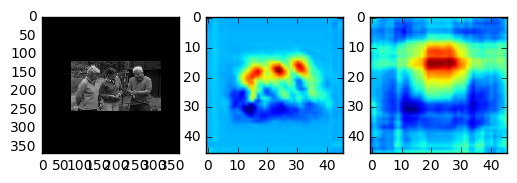

In [3]:

with tf.Graph().as_default():
    images, labels = pose_input.distorted_inputs(
            [FLAGS.tfrecord_path],
            FLAGS.batch_size,
            NUM_TEST_SAMPLES)
    heatmaps0,heatmaps1 = pose_model.inference(images,0.0)
    labels0,labels1 = tf.split(3, 2, labels)
    resized_labels = tf.image.resize_images(labels1,
                                            [pose_model.LABEL_SIZE,pose_model.LABEL_SIZE])
    saver = tf.train.Saver()
    sess = tf.Session()
    
    model_checkpoint_path = os.path.join(FLAGS.checkpoint_dir,'model.ckpt-4500')
    saver.restore(sess, model_checkpoint_path)
    tf.train.start_queue_runners(sess=sess)
    images_val,heatmaps0_val,heatmaps1_val = sess.run([images,heatmaps0,heatmaps1])
    plt.subplot(131)
    plt.imshow(images_val[0,:,:,0],cmap='gray')
    plt.subplot(132)
    plt.imshow(heatmaps0_val[0,:,:,13])
    plt.subplot(133)
    plt.imshow(heatmaps1_val[0,:,:,13])
    plt.show()

[[-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 ..., 
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]]


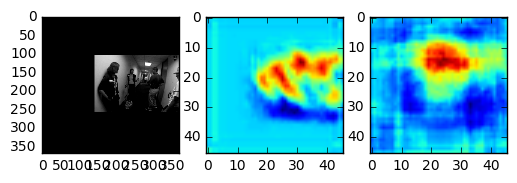

In [26]:
index = 12
print images_val[index,:,:,0]
plt.subplot(131)
plt.imshow(images_val[index,:,:,0],cmap='gray')
plt.subplot(132)
plt.imshow(heatmaps0_val[index,:,:,13])
plt.subplot(133)
plt.imshow(heatmaps1_val[index,:,:,13])
plt.show()

In [6]:
def main(unused_args):
    if tf.gfile.Exists(FLAGS.log_dir):
        tf.gfile.DeleteRecursively(FLAGS.log_dir)
    tf.gfile.MakeDirs(FLAGS.log_dir)
    tf.logging.set_verbosity(tf.logging.INFO)
    evaluate()
    
if __name__ == "__main__":
    tf.app.run()

Filling queue with 3198 images before starting to train. This will take a few minutes.


INFO:tensorflow:Waiting for new checkpoint at segmentation_train
INFO:tensorflow:Found new checkpoint at segmentation_train/model.ckpt-3000
INFO:tensorflow:Starting evaluation at 2016-10-13-21:58:59
INFO:tensorflow:Executing eval ops
INFO:tensorflow:Executing eval_op 1/10
INFO:tensorflow:Executing eval_op 2/10
INFO:tensorflow:Executing eval_op 3/10
INFO:tensorflow:Executing eval_op 4/10
INFO:tensorflow:Executing eval_op 5/10
INFO:tensorflow:Executing eval_op 6/10
INFO:tensorflow:Executing eval_op 7/10
INFO:tensorflow:Executing eval_op 8/10
INFO:tensorflow:Executing eval_op 9/10
INFO:tensorflow:Executing eval_op 10/10
INFO:tensorflow:Executing final op
INFO:tensorflow:Executing summary op
INFO:tensorflow:metric has value 0.530059
INFO:tensorflow:test
INFO:tensorflow:Finished evaluation at 2016-10-13-21:59:04


KeyboardInterrupt: 